**Lab 3** for the course of *Selected Topics in Music and Acoustic Engineering* :

***Machine Learning for Audio and Acoustic Engineering***
---

# **Before you start**

*   Go to "*File*" --> "*Save a copy in Drive*"
*   Open that copy (might open automatically)
*   Then continue below

# **Lab 3: Neural Networks**

In this lab we will start to work with deep learning models. We will begin by looking at simple examples with synthetically generated data. Then, you will move to a more challenging and realistic problem.


### **Exercise 1**: Approximating Synthetic Data

Execute the following lines for create a synthetically generated dataset:

In [1]:
#!conda install tensorflow -y

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn-v0_8")



2025-04-18 10:18:49.871489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def gen_data(size, a, b):
  x = np.random.rand(size,1)-0.5
  y = a*x + b
  y = y*(x>0)
  y = y + 0.2*(np.random.randn(*x.shape))
  return x, y

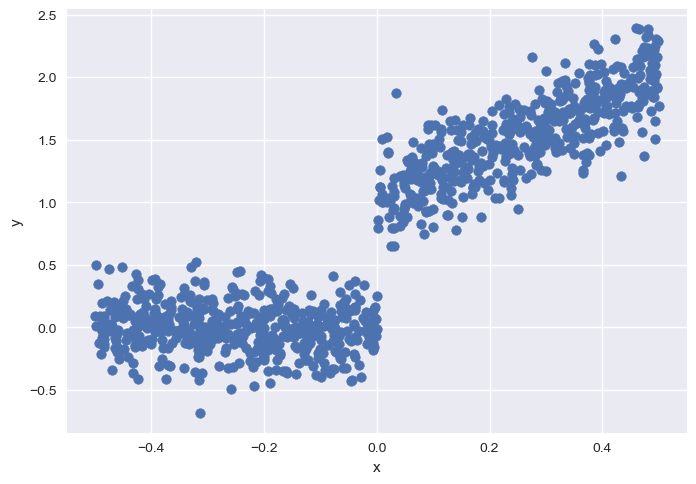

In [3]:
# Create data and plot
Xdata, Ydata = gen_data(1000, 2, 1)
plt.scatter(Xdata,Ydata);
plt.xlabel('x');
plt.ylabel('y');

Describe the function underlying the model used to generate the data. Complete the symbols "?"

\begin{equation}
  y(x)=\begin{cases}
    2x + 1 + 0.2 \cdot  \mathcal{N}(0, 1) & \text{if } x > 0 \text{ , where } x = \mathcal{U}(0, 1) - 0.5 \\
    0.2 \cdot  \mathcal{N}(0, 1), & \text{otherwise}.
  \end{cases}
\end{equation}


### **Exercise 2**: Create a MLP neural network model using Keras

Create the following fully-connected feedforward network using Keras' sequential model. Use:

| Layer | Type  | Units | Activation | Description                                                  |
|-------|-------|-------|------------|--------------------------------------------------------------|
| 1     | Dense | 5     | ReLU       | First hidden layer with 5 neurons, applies non-linearity     |
| 2     | Dense | 5     | ReLU       | Second hidden layer, also with 5 neurons                     |
| 3     | Dense | 1     | Linear     | Output layer, returns a single continuous value (regression) |

Show the model's summary.

![](https://drive.google.com/uc?export=view&id=1UJwycQXQG8kkF0N8CmDW-ED-hY-Uck5o)



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential([
    # First hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu', input_shape=(1,)),
    
    # Second hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu'),
    
    # Output layer with 1 neuron and linear activation (for regression)
    Dense(1, activation='linear')
])

# Show the model's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


2025-04-18 10:18:57.366088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


How many parameters has the model?  (Hint: use the function model.summary())

In [5]:

# Print total number of parameters
model.count_params()

46

Compile the model and train it on Xdata using MSE as the loss function and SGD optimizer with learning rate 0.01. Train the model until reaching 300 epochs.

In [6]:
# model.compile(....)
# history = model.fit(Xdata, Ydata, epochs=...)

from tensorflow.keras.optimizers import SGD

# Compile the model using Mean Squared Error loss and SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='mse'
)

# Train the model on Xdata and Ydata for 300 epochs
history = model.fit(Xdata, Ydata, epochs=300)


Epoch 1/300
32/32 [==============================] - 0s 1ms/step - loss: 0.9380
Epoch 2/300
32/32 [==============================] - 0s 902us/step - loss: 0.6713
Epoch 3/300
32/32 [==============================] - 0s 844us/step - loss: 0.6018
Epoch 4/300
32/32 [==============================] - 0s 818us/step - loss: 0.5726
Epoch 5/300
32/32 [==============================] - 0s 831us/step - loss: 0.5447
Epoch 6/300
32/32 [==============================] - 0s 800us/step - loss: 0.5118
Epoch 7/300
32/32 [==============================] - 0s 827us/step - loss: 0.4724
Epoch 8/300
32/32 [==============================] - 0s 818us/step - loss: 0.4273
Epoch 9/300
32/32 [==============================] - 0s 816us/step - loss: 0.3739
Epoch 10/300
32/32 [==============================] - 0s 798us/step - loss: 0.3173
Epoch 11/300
32/32 [==============================] - 0s 897us/step - loss: 0.2637
Epoch 12/300
32/32 [==============================] - 0s 793us/step - loss: 0.2193
Epoch 13/300
32

Plot the training history of the network, showing the evolution of the training loss.

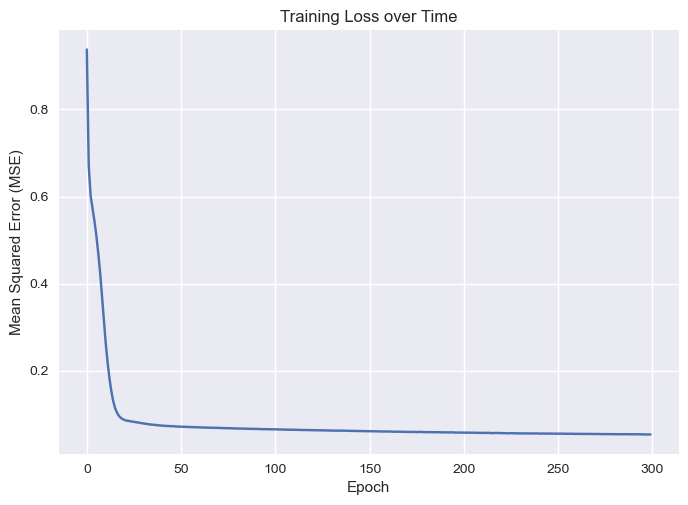

In [7]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [8]:

# Find the minimum loss and its corresponding epoch
min_loss = min(history.history['loss'])
min_loss_index = [i for i, l in enumerate(history.history['loss']) if l == min_loss]

# Print the result 

print('Minumum Loss on the Training Set: ', min_loss , ' obtained at epoch: ', ''.join(map(str, [min_loss_index[0]])) )



Minumum Loss on the Training Set:  0.05298148840665817  obtained at epoch:  297


Plot the true training data together with the approximated data using the predictions.

32/32 [==============================] - 0s 916us/step


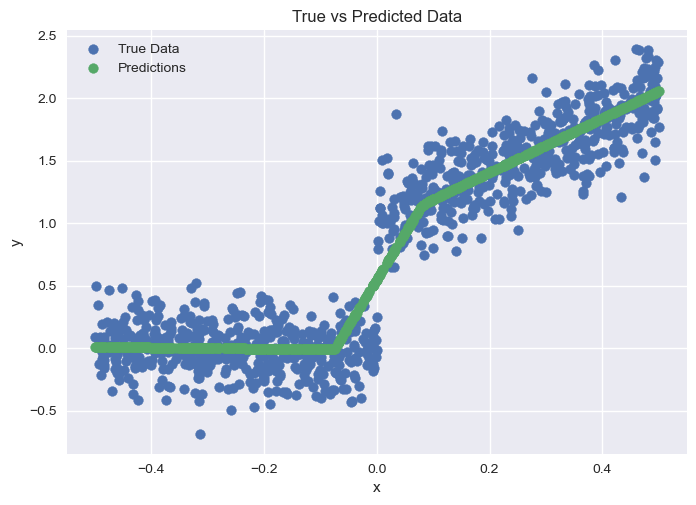

In [9]:

# Make predictions using the trained model
preds = model.predict(Xdata)

# Plot true training data
plt.scatter(Xdata, Ydata, label='True Data')

# Plot predicted data
plt.scatter(Xdata, preds, label='Predictions')

# Add legend and labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()


Now initialize the model again and fit it, but train it for 1000 epochs.

In [10]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the Fully-connected MLP
model_1000 = Sequential([
    Dense(5, activation='relu', input_shape=(1,)),
    Dense(5, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
opt = SGD(learning_rate=0.01)
model_1000.compile(optimizer=opt, loss='mse')

# Training the model
history_1000 = model_1000.fit(Xdata, Ydata, epochs=1000)


Epoch 1/1000
32/32 [==============================] - 0s 951us/step - loss: 0.9645
Epoch 2/1000
32/32 [==============================] - 0s 849us/step - loss: 0.6983
Epoch 3/1000
32/32 [==============================] - 0s 897us/step - loss: 0.6024
Epoch 4/1000
32/32 [==============================] - 0s 940us/step - loss: 0.5515
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.5053
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.4524
Epoch 7/1000
32/32 [==============================] - 0s 881us/step - loss: 0.3953
Epoch 8/1000
32/32 [==============================] - 0s 827us/step - loss: 0.3336
Epoch 9/1000
32/32 [==============================] - 0s 816us/step - loss: 0.2771
Epoch 10/1000
32/32 [==============================] - 0s 813us/step - loss: 0.2276
Epoch 11/1000
32/32 [==============================] - 0s 776us/step - loss: 0.1855
Epoch 12/1000
32/32 [==============================] - 0s 802us/step - loss: 0.1527
Epoch

Plot the original data and the predicted data. What are the differences observed with respect to the case before?

32/32 [==============================] - 0s 703us/step


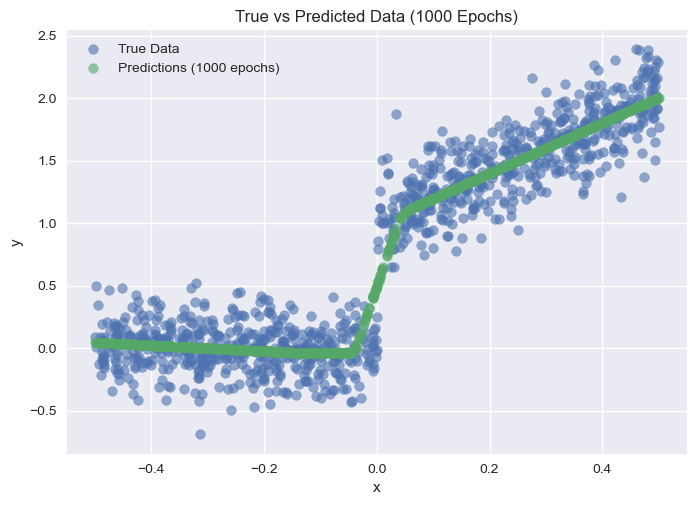

32/32 [==============================] - 0s 698us/step


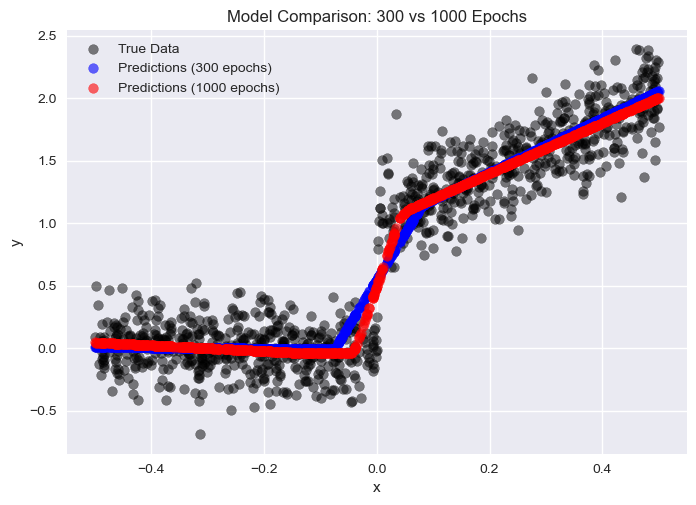

In [11]:
# Predict using the model trained for 1000 epochs
preds_1000 = model_1000.predict(Xdata)

# Plot original data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.6)

# Plot predicted data
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data (1000 Epochs)')
plt.legend()
plt.grid(True)
plt.show()


# Predict using both models
preds_300 = model.predict(Xdata)        # model trained for 300 epochs
preds_1000 = model_1000.predict(Xdata)  # model trained for 1000 epochs

# Plot the true data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.5, color='black')

# Plot predictions from 300 epochs model
plt.scatter(Xdata, preds_300, label='Predictions (300 epochs)', alpha=0.6, color='blue')

# Plot predictions from 1000 epochs model
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6, color='red')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison: 300 vs 1000 Epochs')
plt.legend()
plt.grid(True)
plt.show()



What is the best loss achieved in this case?

In [12]:
# Find the best loss and its epoch for the 1000-epoch model
min_loss_1000 = min(history_1000.history['loss'])
min_loss_index_1000 = [i for i, l in enumerate(history_1000.history['loss']) if l == min_loss_1000]

# Print the result
print('Minimum Loss on the Training Set (1000 epochs):', min_loss_1000, 'obtained at epoch:', min_loss_index_1000[0])


Minimum Loss on the Training Set (1000 epochs): 0.04719959571957588 obtained at epoch: 978


### **Exercise 3**: Classification

Generate synthetically two bivariate Gaussian vectors (see np.random.multivariate_normal), each one with 1000 samples:

*   Xdata0, with mean [-1,-1] and covariance [[4,0],[0,4]]
*   Xdata1, with mean [1,1] and covariance [[3,0],[0,3]]





In [13]:

# Bivariate Gaussian
mean0 = [-1, -1]
cov0 = [[4, 0], [0, 4]]   # diagonal covariance matrix

mean1 = [1, 1]
cov1 = [[3, 0], [0, 3]]

# Generate 1000 samples from each distribution
Xdata0 = np.random.multivariate_normal(mean0, cov0, 1000)
Xdata1 = np.random.multivariate_normal(mean1, cov1, 1000)

# Print shape to verify
print(Xdata0.shape, Xdata1.shape)

(1000, 2) (1000, 2)


Expected output:
```
(1000, 2) (1000, 2)
```

From the above Gaussian vectors, stack them to generate a feature data matrix Xdatac with shape (2000,2) and the corresponding label vector Ydatac with zeros and ones of shape (2000,)

In [14]:
#Features
# Features
Xdatac = np.vstack((Xdata0, Xdata1))  # Stack vertically: shape (2000, 2)

# Labels
labels0 = np.zeros(Xdata0.shape[0])   # Class 0 (1000 samples)
labels1 = np.ones(Xdata1.shape[0])    # Class 1 (1000 samples)
labels_gt = np.concatenate((labels0, labels1), axis=0)  # Shape (2000,)

# Check dimensions
print(Xdatac.shape, labels_gt.shape)


(2000, 2) (2000,)


Expected output:
```
(2000, 2) (2000, 2)
```

Create a scatterplot of the two classes:

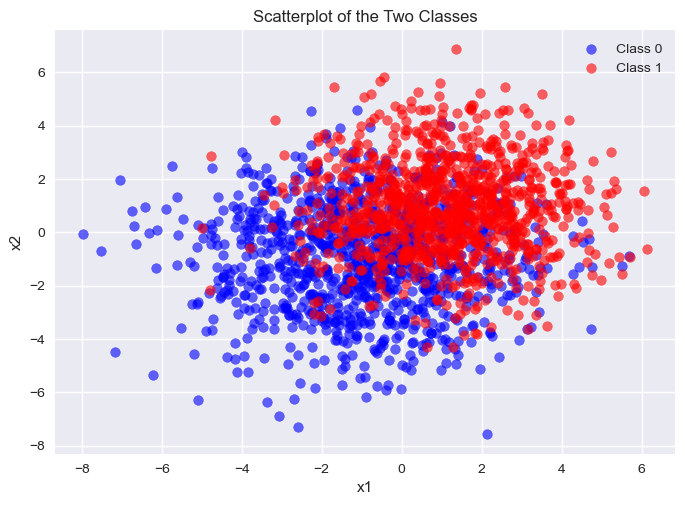

In [15]:
# Class 0
plt.scatter(Xdatac[labels_gt == 0, 0], Xdatac[labels_gt == 0, 1], 
            label='Class 0', alpha=0.6, c='blue')

# Class 1
plt.scatter(Xdatac[labels_gt == 1, 0], Xdatac[labels_gt == 1, 1], 
            label='Class 1', alpha=0.6, c='red')

# Aesthetics
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of the Two Classes')
plt.legend()
plt.grid(True)
plt.show()

Divide the data Xdatac into a training partition and validation partition using "train_test_split" from sklearn. Use 30% of your data for validation.

In [16]:
from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(....)



# Split: 70% training, 30% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    Xdatac, labels_gt, test_size=0.3, random_state=42
)




#  verify shapes
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)



(1400, 2) (600, 2) (1400,) (600,)


Create a model identical to the one of Exercise 2 but use sigmoid activation in the output layer. You need also now to specify that the input has two values.

Train the model on the training partion. Select as loss function "binary_crossentropy" and monitor the training accuracy using metrics=["accuracy"]. Use also the validation partition to track the validation accuracy at each epoch.

In [17]:
# Define the Fully-connected MLP

# ...

# Compiling the model
# ...

# Training the model
# history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# Define the Fully-connected MLP for classification
model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),   # input shape is now (2,)
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')                   # sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=300
)

Epoch 1/300
44/44 [==============================] - 1s 6ms/step - loss: 1.3475 - accuracy: 0.4143 - val_loss: 0.9191 - val_accuracy: 0.3583
Epoch 2/300
44/44 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.3721 - val_loss: 0.6824 - val_accuracy: 0.4783
Epoch 3/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.5986 - val_loss: 0.6121 - val_accuracy: 0.6683
Epoch 4/300
44/44 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6821 - val_loss: 0.5787 - val_accuracy: 0.7333
Epoch 5/300
44/44 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7329 - val_loss: 0.5577 - val_accuracy: 0.7700
Epoch 6/300
44/44 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7450 - val_loss: 0.5413 - val_accuracy: 0.7833
Epoch 7/300
44/44 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7543 - val_loss: 0.5276 - val_accuracy: 0.7850
Epoch 8/300
4

Plot the training history showing the training accuracy and validation accuracy.

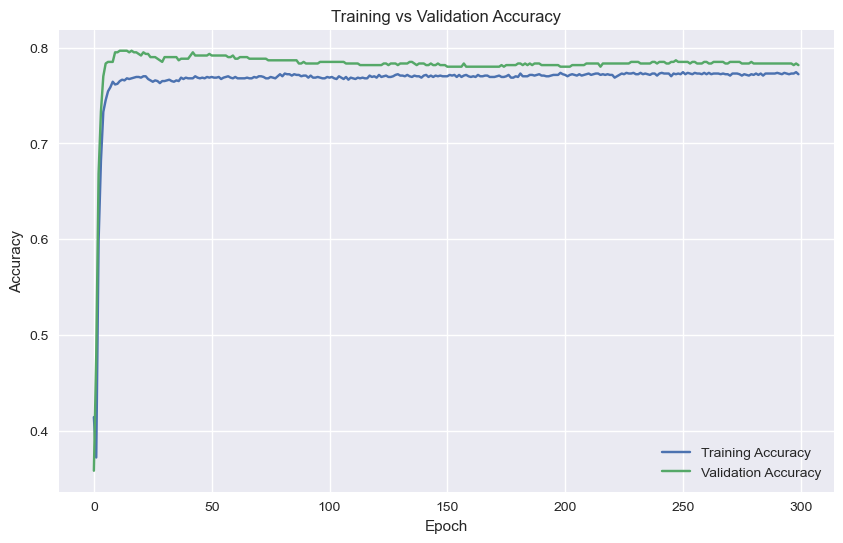

In [18]:
# Plot training  validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Aesthetics
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Predict over the training data and create a scatter plot showing the predicted class for each data example.

44/44 [==============================] - 0s 716us/step


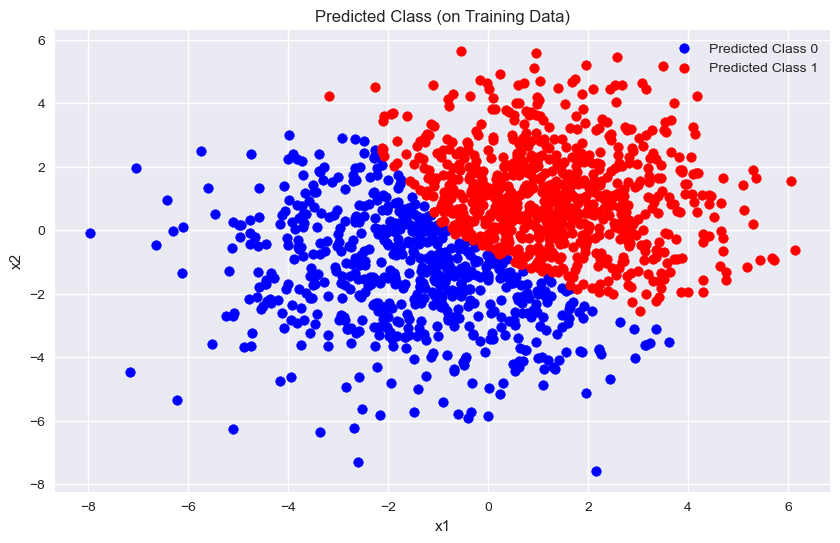

In [19]:
# Predict on training data 
y_pred_probs = model.predict(X_train)


# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Scatter plot of predicted classes
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_pred_classes == 0, 0], X_train[y_pred_classes == 0, 1], c='blue', label='Predicted Class 0')
plt.scatter(X_train[y_pred_classes == 1, 0], X_train[y_pred_classes == 1, 1], c='red', label='Predicted Class 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Class (on Training Data)')
plt.legend()
plt.grid(True)
plt.show()

Scatter the prediction

### **Exercise 4**: Data Preparation


Follow the same steps in Lab 2 to download the ESC-50 dataset.

In [20]:
#!wget https://github.com/karolpiczak/ESC-50/archive/master.zip
#!unzip master.zip

Create a list of the files corresponding to the 10 first classes. Those files will form our dataset (400 signals).

In [21]:
fn_csv = 'ESC-50-master/meta/esc50.csv'

files = []  # File list
labels = []  # Class list


# Read CSV
df = pd.read_csv(fn_csv)

# Loop through CSV rows and collect the first 10 classes
for i in range(len(df)):
    if df.loc[i, 'category'] in df['category'].unique()[:10]:
        files.append(df.loc[i, 'filename'])
        labels.append(df.loc[i, 'category'])

# Convert labels to numerical (0 to 9)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

print(f'Lengths: esc5_X: {len(files)}, esc5_y: {len(labels)}')


Lengths: esc5_X: 400, esc5_y: 400


Expected output:

``` Lengths: esc5_X: 400, esc5_y: 400 ```

Convert the labels to class indexes (rank 1) - e.g. 0,1,2,....,9

In [22]:

labels = le.fit_transform(labels)
print(le.classes_) 


[0 1 2 3 4 5 6 7 8 9]


Create a list storing the signals from all the files:

In [23]:
import os

# Create an empty list to store all the audio signals
signals = []

# Iterate over the list of file paths
for f in files:
    # Load the audio file using librosa (default sampling rate is 22050 Hz)
    signal, sr = librosa.load(os.path.join('ESC-50-master/audio/', f), sr=22050)
    
    # Append the signal to the list
    signals.append(signal)



For each signal in the list, compute the melspectrogram with librosa using default parameters:

In [24]:
# Check the length of the first signal
print(f"Length of first signal: {len(signals[0])}")

# List to store mel spectrograms
mel_spegrams = []

# Compute mel spectrograms using default parameters
for signal in signals:
    mel_spec = librosa.feature.melspectrogram(y=signal)  # default: sr=22050, n_mels=128
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spegrams.append(mel_spec_db)


Length of first signal: 110250


Convert the list to a numpy array called Xdata. You should end up with an array of shape (400, 128, 216). What do these numbers mean?

In [25]:
Xdata = np.asarray(mel_spegrams)
Xdata.shape

(400, 128, 216)

Expected output:

```(400, 128, 216)```

ANSWER THE QUESTION HERE!

### **Exercise 5**: MLP Classification

Let's try now to classify the audio files by using the computed mel spectrogram data. First, flatten each spectrogram into a one-dimensional array, so that you end up with a new array Xdata_f of shape (400, 27648). You can do that by using the function reshape from numpy.

In [26]:
# Flatten each mel spectrogram (128 × 216) into a single vector (27648)
Xdata_f = Xdata.reshape(Xdata.shape[0], -1)

print(Xdata_f.shape)

(400, 27648)


Expected output:
```
(400, 27648)
```

Let's first use the sklearn StandardScaler function to scale the data (save the output in Xdata_s)

In [27]:

# Create the scaler and fit it to the data
scaler = StandardScaler()
Xdata_s = scaler.fit_transform(Xdata_f)


Create a test and validation split with 20% of the samples. Call the splits X_train, y_train, X_val, y_val.

In [28]:
X_train, X_val, y_train, y_val = train_test_split(Xdata_s, labels, test_size=0.2, random_state=42, stratify=labels)


Now, create a MLP-based network for classifying these audios. You can use the same layer structure as in the previous examples, but remember to adapt the output layer so that its size is equal to the number of classes and apply 'softmax' activation. You can also try to increase the number of neurons in the hidden layers.

Proposed architecture:

| Layer | Type  | Units | Activation | Output Shape           | Description                                  |
|-------|-------|-------|------------|-------------------------|----------------------------------------------|
| Input | Input | -     | -          | (None, shape_size)      | Input layer with `shape_size` features       |
| 1     | Dense | 16    | ReLU       | (None, 16)              | First hidden layer with 16 neurons           |
| 2     | Dense | 16    | ReLU       | (None, 16)              | Second hidden layer with 16 neurons          |
| 3     | Dense | 10    | Softmax    | (None, 10)              | Output layer for 10-class classification     |

In [29]:
# Create a Sequential model
model = Sequential()

# Input layer with 'shape_size' features and first hidden layer with 16 neurons (ReLU activation)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer with 16 neurons (ReLU activation)
model.add(Dense(16, activation='relu'))

# Output layer with 10 neurons (Softmax for 10-class classification)
model.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


# Model 2: With increased number of neurons in the hidden layers (Try block)
#model_try = Sequential()

# Input layer + First hidden layer with 64 neurons
#model_try.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer with 64 neurons
#model_try.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (Softmax)
#model_try.add(Dense(10, activation='softmax'))

# Compile the model
#model_try.compile(optimizer='adam',
                  #loss='sparse_categorical_crossentropy',
                  #metrics=['accuracy'])

# Print the model summary
##print("\nModel 2: Increased hidden layer size (Try block)")
#model_try.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                442384    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 442,826
Trainable params: 442,826
Non-trainable params: 0
_________________________________________________________________


Fit the model using "sparse_categorical_crossentropy" as loss function. Probably your first attempts will overfit.

Try different strategies to prevent overfitting:

*   Dropout
*   Regularization
*   Reduce number of neurons/layers

What is the best accuracy you could get with a fully-based MLP network?


In [36]:



# Training the model

# Train the base model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=1
)

# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300)


Epoch 1/300
10/10 [==============================] - 1s 25ms/step - loss: 4.8294 - accuracy: 0.1219 - val_loss: 3.1449 - val_accuracy: 0.2000
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 3.1397 - accuracy: 0.2719 - val_loss: 3.2323 - val_accuracy: 0.2250
Epoch 3/300
10/10 [==============================] - 0s 8ms/step - loss: 2.2801 - accuracy: 0.3125 - val_loss: 2.4434 - val_accuracy: 0.3625
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 2.3180 - accuracy: 0.4250 - val_loss: 2.4009 - val_accuracy: 0.3500
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 1.6621 - accuracy: 0.5156 - val_loss: 2.2879 - val_accuracy: 0.4375
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 1.4200 - accuracy: 0.5344 - val_loss: 2.1280 - val_accuracy: 0.4125
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 1.3438 - accuracy: 0.5375 - val_loss: 2.3175 - val_accuracy: 0.4500
Epoch 8/300


Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [39]:
# Extract validation loss and accuracy from the training history
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Find the minimum validation loss and its corresponding epoch
min_val_loss = np.min(val_loss_history)
min_val_loss_epoch = np.argmin(val_loss_history)

# Get the validation accuracy at the epoch of minimum loss
accuracy_at_min_loss = val_accuracy_history[min_val_loss_epoch]

# Print results
print(f"Minimum validation loss: {min_val_loss:.4f} at epoch {min_val_loss_epoch}")
print(f"Validation accuracy at that epoch: {accuracy_at_min_loss:.4f}")

Minimum validation loss: 2.1280 at epoch 5
Validation accuracy at that epoch: 0.4125


Plot the training history of the network, showing the evolution of the training/validation loss.

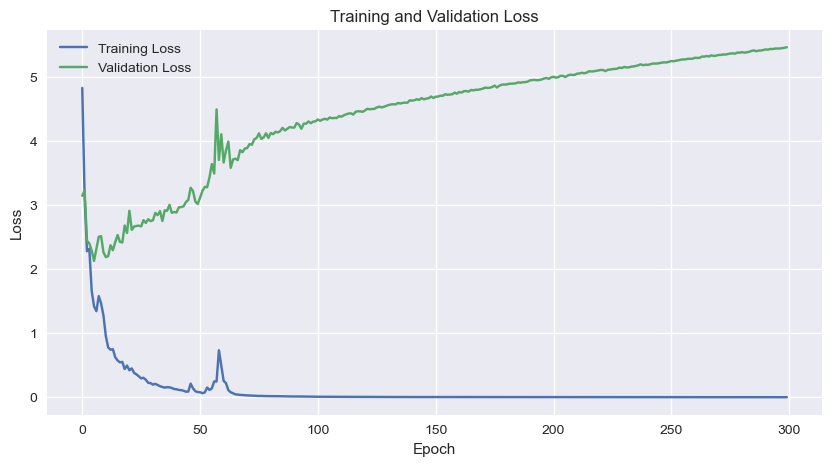

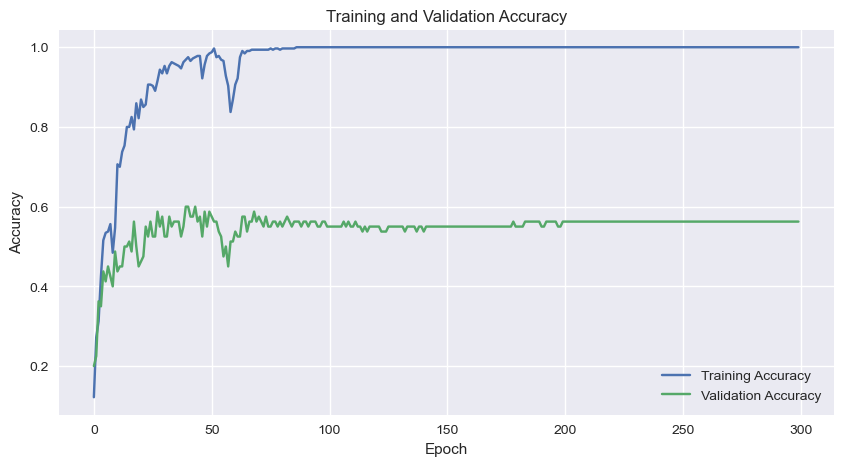

In [40]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# plot training & validation accuracy values

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


* REPEAT EXPERIMENTS USING THE AFOREMENTIONED TECHNIQUES TO PREVENT OVERFITTING

### **Exercise 6**: CNN

Create training and validation partitions from Xdata. Remember that Xdata stores has size (400, 128, 216), storing 400 Mel spectrograms of sie (128,216). Name the partitions X_train, X_test, y_train and y_test.

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(..., test_size=0.2)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Scale each spectrogram by substracting its mean and dividing by its standard deviation.

In [32]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_s = []
X_test_s = []

# ...

X_train_s = np.asarray(X_train_s)
X_test_s = np.asarray(X_test_s)

Create a convolutional neural network model. Remember to adapt the input shape of the first layer to the new input. 

You can start with a model like the next one. Remember to include regularization strategies like dropout layers.

| Layer | Type        | Filters/Units | Kernel/Pool Size | Activation | Output Shape        | Description                                  |
|-------|-------------|----------------|------------------|------------|---------------------|----------------------------------------------|
| Input | Input        | -              | -                | -          | (None, H, W, C)      | Input shape from `X_train_sx.shape[1:]`      |
| 1     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, H-2, W-2, 16) | First convolutional layer                    |
| 2     | MaxPooling2D | -              | (3, 3), stride 3 | -          | (None, H//3, W//3, 16) | Downsamples feature maps                     |
| 3     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, ..., ..., 16) | Second convolutional layer                   |
| 4     | MaxPooling2D | -              | (2, 2), stride 2 | -          | (None, ..., ..., 16) | Second pooling layer                         |
| 5     | Conv2D       | 32             | (2, 2)           | ReLU       | (None, ..., ..., 32) | Third convolutional layer                    |
| 6     | Flatten      | -              | -                | -          | (None, N)            | Flattens 2D features to 1D vector            |
| 7     | Dense        | 32             | -                | ReLU       | (None, 32)           | Fully connected hidden layer                 |
| 8     | Dropout      | -              | -                | -          | (None, 32)           | Dropout for regularization (rate=0.1)        |
| 9     | Dense        | 10             | -                | Softmax    | (None, 10)           | Output layer for 10-class classification     |

In [33]:
# expanding X_train_s and X_test_s to fit conv2d
# ...

Fit the model and try to improve the results obtained with the MLP model.

In [34]:
#compile the model
# ...

#fit the model
# history = model.fit(X_train_sx, y_train, validation_data=(X_test_sx, y_test), batch_size=32, epochs=100)

Plot the training history (train/val loss/accuracy)

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [35]:
# ...

# print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0].item())] )

Tune your model and try to achieve an accuracy above 60%.